In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np 
import os
import pandas as pd
import os
import numpy as np

import numpy as np
import itertools
import scipy.special as special 
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
from torch.utils. data import DataLoader, random_split
from sklearn.model_selection import KFold
import json
import warnings
from torch import nn
from torch.optim import Adam,LBFGS
from torch.utils.data import DataLoader

In [3]:
jsi_data = '/content/drive/MyDrive/24789 EE Project/JSI Preprocessing/Aligned & Interpolated/1Hz'
slade_data = '/content/drive/MyDrive/24789 EE Project/Slade Preprocessing/Aligned & Interpolated/1 Hz/'

In [4]:
# Dan's path
jsi_data = '/content/drive/MyDrive/CMU/Spring 2022/24789/24789 EE Project/JSI Preprocessing/Aligned & Interpolated/1Hz'
slade_data = '/content/drive/MyDrive/CMU/Spring 2022/24789/24789 EE Project/Slade Preprocessing/Aligned & Interpolated/1 Hz'

In [5]:
data_select = 'all'

In [6]:
if data_select == 'all':
  source_list = ['ANKLE','THIGH','HR']
if data_select == 'accelerometer':
  source_list = ['ANKLE','THIGH']
if data_select == 'Heart Rate':
  source_list = ['HR']
if data_select == 'all plus activity':
  source_list = ['ANKLE','THIGH','HR']
if data_select == 'imu plus activity':
  source_list = ['ANKLE','THIGH']
if data_select == 'heart rate plus activity':
  source_list = ['HR']



In [7]:
def activity_data_convert(activity_name,data_len):
  if activity_name == 'Walk':
    activity_num = 0
  if activity_name == 'Run':
    activity_num = 1
  if activity_name == 'Stairclimb':
    activity_num = 2
  if activity_name == 'Cycle':
    activity_num = 3

  output_list = activity_num*np.ones(data_len)
  output_list = np.expand_dims(output_list, axis=1)
  return output_list

In [8]:
#JSI Data
data_list = []
target_list =[]
activity_list =[]
for filename in os.listdir(jsi_data):
  if 'Person' in filename:
    print(filename)
    temp = pd.read_csv(jsi_data+'/'+filename)
    target_cols = [col for col in temp.columns if 'COSMED' in col]
    target_list.append(temp[target_cols].values)
    data_cols = [col for col in temp.columns for j in source_list if j in col ]
    input_data = temp[data_cols].values
    temp_name = filename.split(sep='_')[1]
    activity_name = temp_name.replace(".csv","")
    if 'plus activity' in data_select:
        output_list = activity_data_convert(activity_name,len(input_data))
        input_data = np.append(input_data, output_list,1)
    data_list.append(input_data)
    
    
    activity_list.append(activity_name)
    #data_list.append(EE_Dataset(target_list,input_data,activity_name))


PersonA_Walk.csv
PersonA_Run.csv
PersonA_Cycle.csv
PersonB_Walk.csv
PersonB_Run.csv
PersonB_Cycle.csv
PersonC_Walk.csv
PersonC_Run.csv
PersonC_Cycle.csv
PersonD_Walk.csv
PersonD_Run.csv
PersonD_Cycle.csv
PersonE_Walk.csv
PersonE_Run.csv
PersonE_Cycle.csv
PersonF_Run.csv
PersonF_Walk.csv
PersonF_Cycle.csv
PersonG_Walk.csv
PersonG_Run.csv
PersonG_Cycle.csv
PersonH_Walk.csv
PersonH_Run.csv
PersonH_Cycle.csv


In [9]:
for filename in os.listdir(slade_data):
  if '.csv' in filename:
    print(filename)
    temp = pd.read_csv(slade_data+'/'+filename)
    target_cols = [col for col in temp.columns if 'MET' in col and not 'MET HR' in col]
    target_list.append(temp[target_cols].values)
    data_cols = [col for col in temp.columns for j in source_list if j in col ]
    input_data = temp[data_cols].values
    
    
    #1- quiet standing
    #2- walking at 1.0 m/s
    #3- walking at 1.5 m/s
    #4- running at 2.5 m/s
    #5- running at 3.0 m/s
    #6- climbing stairs at 50 steps/min
    #7- climbing stairs at 70 steps/min
    #8- biking with resistance of 50 Watts
    #9- biking with resistance of 120 Watts 

    if 'C02' in filename or 'C03' in filename:
      activity_name = 'Walk'
    elif 'C04' in filename or 'C05' in filename:
      activity_name = 'Run'
    elif 'C06' in filename or 'C07' in filename:
      activity_name = 'Stairclimb'
    elif 'C08' in filename or 'C09' in filename:
      activity_name = 'Cycle'
    #print(activity_name)
    if 'plus activity' in data_select:
        output_list = activity_data_convert(activity_name,len(input_data))
        input_data = np.append(input_data, output_list,1)
#    output_list = activity_data_convert(activity_name,len(input_data))
#    input_data = np.append(input_data, output_list,1)
    activity_list.append(activity_name)


    data_list.append(input_data)
    #data_list.append(EE_Dataset(target_list,input_data,activity_name))


S01C02_1Hz.csv
S01C03_1Hz.csv
S01C04_1Hz.csv
S01C05_1Hz.csv
S01C06_1Hz.csv
S01C07_1Hz.csv
S01C08_1Hz.csv
S01C09_1Hz.csv
S02C02_1Hz.csv
S02C03_1Hz.csv
S02C04_1Hz.csv
S02C05_1Hz.csv
S02C06_1Hz.csv
S02C07_1Hz.csv
S02C08_1Hz.csv
S02C09_1Hz.csv
S03C02_1Hz.csv
S03C03_1Hz.csv
S03C04_1Hz.csv
S03C05_1Hz.csv
S03C06_1Hz.csv
S03C07_1Hz.csv
S03C08_1Hz.csv
S03C09_1Hz.csv
S04C02_1Hz.csv
S04C03_1Hz.csv
S04C04_1Hz.csv
S04C05_1Hz.csv
S04C06_1Hz.csv
S04C07_1Hz.csv
S04C08_1Hz.csv
S04C09_1Hz.csv
S05C02_1Hz.csv
S05C03_1Hz.csv
S05C04_1Hz.csv
S05C05_1Hz.csv
S05C06_1Hz.csv
S05C07_1Hz.csv
S05C08_1Hz.csv
S05C09_1Hz.csv
S06C02_1Hz.csv
S06C03_1Hz.csv
S06C04_1Hz.csv
S06C05_1Hz.csv
S06C06_1Hz.csv
S06C07_1Hz.csv
S06C08_1Hz.csv
S06C09_1Hz.csv
S07C02_1Hz.csv
S07C03_1Hz.csv
S07C04_1Hz.csv
S07C05_1Hz.csv
S07C06_1Hz.csv
S07C07_1Hz.csv
S07C08_1Hz.csv
S07C09_1Hz.csv
S08C02_1Hz.csv
S08C03_1Hz.csv
S08C06_1Hz.csv
S08C08_1Hz.csv
S08C09_1Hz.csv
S09C02_1Hz.csv
S09C03_1Hz.csv
S09C04_1Hz.csv
S09C05_1Hz.csv
S09C06_1Hz.csv
S09C07_1Hz

In [10]:
activity_labels = [0 if x == 'Walk' else x for x in activity_list]
activity_labels = [1 if x == 'Run' else x for x in activity_labels]
activity_labels = [2 if x == 'Stairclimb' else x for x in activity_labels]
activity_labels = [3 if x == 'Cycle' else x for x in activity_labels]
target_list =activity_labels
# one_hot_activity = torch.zeros((len(target_list), 4))
# for idx, val in enumerate(activity_labels):
#   one_hot_activity[idx][val] = 1
# print(one_hot_activity)
print(target_list)
print(len(target_list))

[0, 1, 3, 0, 1, 3, 0, 1, 3, 0, 1, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 0, 1, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 3, 3, 0, 0, 2, 3, 3, 0, 0, 1, 2, 3, 3, 0, 0, 1, 2, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2, 2, 3, 3, 0, 0, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 1, 1, 2, 2, 3, 3]
180


<Figure size 800x960 with 0 Axes>

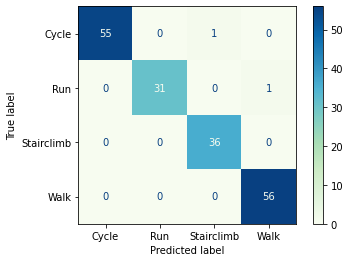

Accuracy:  0.9888888888888889


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import plot_confusion_matrix
y_true = target_list
# y_pred_all = np.load('/content/drive/MyDrive/24789 EE Project/Saved Variables/labels_all.npy')
# Dan's path below
y_pred_all = np.load('/content/drive/MyDrive/CMU/Spring 2022/24789/24789 EE Project/Saved Variables/labels_all.npy')

y_true_activity=[]
y_pred_all_activity = []
for i in y_true:
  if i == 0:
    y_true_activity.append('Walk')
  if i == 1:
    y_true_activity.append('Run')
  if i == 2:
    y_true_activity.append('Stairclimb')
  if i == 3:
    y_true_activity.append('Cycle')

for i in y_pred_all:
  if i == 0:
    y_pred_all_activity.append('Walk')
  if i == 1:
    y_pred_all_activity.append('Run')
  if i == 2:
    y_pred_all_activity.append('Stairclimb')
  if i == 3:
    y_pred_all_activity.append('Cycle')
from matplotlib.pyplot import figure
figure(figsize=(10, 12), dpi=80)
ConfusionMatrixDisplay.from_predictions(y_true_activity, y_pred_all_activity,cmap='GnBu')

plt.show()

print('Accuracy: ', sum(y_pred_all == y_true)/len(y_true))

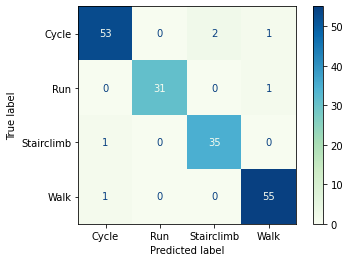

Accuracy:  0.9666666666666667


In [12]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
y_true = target_list
# y_pred_hr = np.load('/content/drive/MyDrive/24789 EE Project/Saved Variables/labels_hr.npy')
# Dan's path below
y_pred_hr = np.load('/content/drive/MyDrive/CMU/Spring 2022/24789/24789 EE Project/Saved Variables/labels_hr.npy')

y_true_activity=[]
y_pred_hr_activity = []
for i in y_true:
  if i == 0:
    y_true_activity.append('Walk')
  if i == 1:
    y_true_activity.append('Run')
  if i == 2:
    y_true_activity.append('Stairclimb')
  if i == 3:
    y_true_activity.append('Cycle')

for i in y_pred_hr:
  if i == 0:
    y_pred_hr_activity.append('Walk')
  if i == 1:
    y_pred_hr_activity.append('Run')
  if i == 2:
    y_pred_hr_activity.append('Stairclimb')
  if i == 3:
    y_pred_hr_activity.append('Cycle')

ConfusionMatrixDisplay.from_predictions(y_true_activity, y_pred_hr_activity,cmap='GnBu')
plt.show()

print('Accuracy: ', sum(y_pred_hr == y_true)/len(y_true))

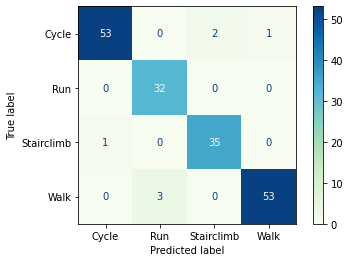

Accuracy:  0.9611111111111111


In [13]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
y_true = target_list
# y_pred_imus = np.load('/content/drive/MyDrive/24789 EE Project/Saved Variables/labels_imus.npy')
# Dan's path below
y_pred_imus = np.load('/content/drive/MyDrive/CMU/Spring 2022/24789/24789 EE Project/Saved Variables/labels_imus.npy')

y_true_activity=[]
y_pred_imus_activity = []
for i in y_true:
  if i == 0:
    y_true_activity.append('Walk')
  if i == 1:
    y_true_activity.append('Run')
  if i == 2:
    y_true_activity.append('Stairclimb')
  if i == 3:
    y_true_activity.append('Cycle')

for i in y_pred_imus:
  if i == 0:
    y_pred_imus_activity.append('Walk')
  if i == 1:
    y_pred_imus_activity.append('Run')
  if i == 2:
    y_pred_imus_activity.append('Stairclimb')
  if i == 3:
    y_pred_imus_activity.append('Cycle')


ConfusionMatrixDisplay.from_predictions(y_true_activity, y_pred_imus_activity,cmap='GnBu')
plt.show()

print('Accuracy: ', sum(y_pred_imus == y_true)/len(y_true))

In [16]:
y_true == y_pred_all

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,